# Kaggle New York City Taxi Duration



https://www.kaggle.com/c/nyc-taxi-trip-duration/kernels

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
from ipyleaflet import *
import time

%matplotlib inline

In [2]:
train = pd.read_csv("~/Documents/taxi_data/train.csv")
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# unit

### latitude / longtitude = decimal degree (111.32mm per 0.000001°)
- 40.767937° / -73.982155°

### duration = sec
- 455 sec = 7min 35sec

In [3]:
# train.info()

In [4]:
# train.describe()

In [5]:
9.594923e+02

959.4923

In [15]:
np.random.seed(2)
train_sample = train.sample(frac=0.005, replace=True)
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 100879 to 1074490
Data columns (total 11 columns):
id                    7293 non-null object
vendor_id             7293 non-null int64
pickup_datetime       7293 non-null object
dropoff_datetime      7293 non-null object
passenger_count       7293 non-null int64
pickup_longitude      7293 non-null float64
pickup_latitude       7293 non-null float64
dropoff_longitude     7293 non-null float64
dropoff_latitude      7293 non-null float64
store_and_fwd_flag    7293 non-null object
trip_duration         7293 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 683.7+ KB


In [16]:
train_sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
100879,id0673821,2,2016-03-19 20:53:44,2016-03-19 21:18:11,2,-73.990944,40.732998,-73.944931,40.774727,N,1467
203245,id3465534,2,2016-04-25 14:31:34,2016-04-25 14:37:05,2,-73.982185,40.752148,-73.988281,40.742992,N,331
1133010,id1354600,1,2016-05-04 16:35:10,2016-05-04 16:41:07,1,-73.969307,40.760986,-73.978966,40.747524,N,357
961799,id3014975,1,2016-01-16 10:41:51,2016-01-16 10:56:41,1,-73.986877,40.766727,-73.955513,40.826473,N,890
1102498,id0962434,1,2016-01-14 04:30:56,2016-01-14 04:34:37,1,-73.981865,40.758327,-73.991219,40.750141,N,221


In [17]:
train_sample.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000
mean,1.528726,1.667626,-73.973591,40.751095,-73.973485,40.751617,975.675168
std,0.499208,1.326878,0.037878,0.027623,0.036893,0.031980,3415.942518
min,1.000000,1.000000,-74.222603,40.582989,-74.222603,40.556728,2.000000
25%,1.000000,1.000000,-73.991737,40.737495,-73.991188,40.736305,408.000000
50%,2.000000,1.000000,-73.981667,40.754292,-73.979797,40.754429,675.000000
75%,2.000000,2.000000,-73.967194,40.768204,-73.963463,40.769367,1065.000000
max,2.000000,6.000000,-73.776566,40.903709,-73.587265,41.027721,86267.000000


In [18]:
#out of 95 percent value
train_sample1 = pd.DataFrame.quantile(train_sample, q = 0.95)
train_sample1

vendor_id               2.000000
passenger_count         5.000000
pickup_longitude      -73.887389
pickup_latitude        40.787579
dropoff_longitude     -73.919923
dropoff_latitude       40.797626
trip_duration        2101.200000
Name: 0.95, dtype: float64

In [19]:
#out of 5 percent value
train_sample2 = pd.DataFrame.quantile(train_sample, q = 0.05)
train_sample2

vendor_id              1.000000
passenger_count        1.000000
pickup_longitude     -74.006631
pickup_latitude       40.709023
dropoff_longitude    -74.007607
dropoff_latitude      40.700454
trip_duration        185.000000
Name: 0.05, dtype: float64

In [20]:
#train['trip_duration']
#convert duration unit : sec to min
train_sample["pickup_datetime"] =  pd.to_datetime(train_sample["pickup_datetime"])
train_sample["dropoff_datetime"] =  pd.to_datetime(train_sample["dropoff_datetime"])
sample_duration = train_sample["dropoff_datetime"] - train_sample["pickup_datetime"]
sample_duration_sec = sample_duration.dt.total_seconds().astype('int')
train_sample["dur_min"] = (sample_duration_sec / 60).astype('int')
print(train_sample['dur_min'][0:2])

print(train_sample["pickup_datetime"][0:3])
print(train_sample["dropoff_datetime"][0:3])
print(train_sample["dropoff_datetime"][0:3] - train_sample["pickup_datetime"][0:3])

100879    24
203245     5
Name: dur_min, dtype: int64
100879    2016-03-19 20:53:44
203245    2016-04-25 14:31:34
1133010   2016-05-04 16:35:10
Name: pickup_datetime, dtype: datetime64[ns]
100879    2016-03-19 21:18:11
203245    2016-04-25 14:37:05
1133010   2016-05-04 16:41:07
Name: dropoff_datetime, dtype: datetime64[ns]
100879    00:24:27
203245    00:05:31
1133010   00:05:57
dtype: timedelta64[ns]


In [21]:
#day of week
#Monday=0, Sunday=6
train_sample["pick_dayofweek"] = train_sample["pickup_datetime"].dt.dayofweek
train_sample["drop_dayofweek"] = train_sample["dropoff_datetime"].dt.dayofweek
print(train_sample["pick_dayofweek"][0:3])
print(train_sample["drop_dayofweek"][0:3])

100879     5
203245     0
1133010    2
Name: pick_dayofweek, dtype: int64
100879     5
203245     0
1133010    2
Name: drop_dayofweek, dtype: int64


In [22]:
#day of month
train_sample["pick_dayofmonth"] = train_sample["pickup_datetime"].dt.month
train_sample["drop_dayofmonth"] = train_sample["dropoff_datetime"].dt.month
print(train_sample["pick_dayofmonth"][0:3])
print(train_sample["drop_dayofmonth"][0:3])

100879     3
203245     4
1133010    5
Name: pick_dayofmonth, dtype: int64
100879     3
203245     4
1133010    5
Name: drop_dayofmonth, dtype: int64


In [23]:
#day of hour
train_sample["pick_datehour"] = train_sample["pickup_datetime"].dt.hour
train_sample["drop_datehour"] = train_sample["dropoff_datetime"].dt.hour
print(train_sample["pick_datehour"][0:3])
print(train_sample["drop_datehour"][0:3])

100879     20
203245     14
1133010    16
Name: pick_datehour, dtype: int64
100879     21
203245     14
1133010    16
Name: drop_datehour, dtype: int64


In [24]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 100879 to 1074490
Data columns (total 18 columns):
id                    7293 non-null object
vendor_id             7293 non-null int64
pickup_datetime       7293 non-null datetime64[ns]
dropoff_datetime      7293 non-null datetime64[ns]
passenger_count       7293 non-null int64
pickup_longitude      7293 non-null float64
pickup_latitude       7293 non-null float64
dropoff_longitude     7293 non-null float64
dropoff_latitude      7293 non-null float64
store_and_fwd_flag    7293 non-null object
trip_duration         7293 non-null int64
dur_min               7293 non-null int64
pick_dayofweek        7293 non-null int64
drop_dayofweek        7293 non-null int64
pick_dayofmonth       7293 non-null int64
drop_dayofmonth       7293 non-null int64
pick_datehour         7293 non-null int64
drop_datehour         7293 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(10), object(2)
memory usage: 1.4+ MB


In [25]:
# train_sample_1 = train_sample.loc[:,["pick_dayofweek","dur_min"]]
# train_sample_1.tail()

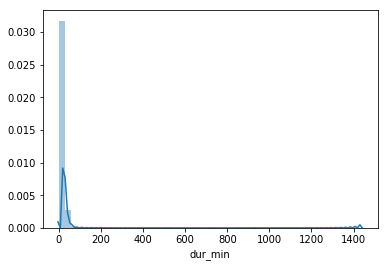

In [26]:
sns.distplot(train_sample["dur_min"])

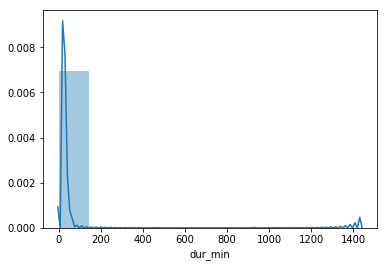

In [27]:
sns.distplot(train_sample["dur_min"], bins = 10)

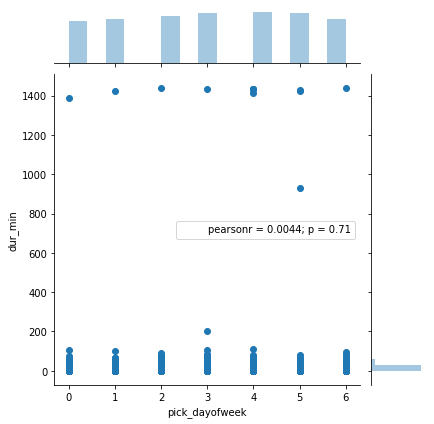

In [28]:
sns.jointplot(x = "pick_dayofweek", y = "dur_min", data = train_sample)

In [29]:
# sns.heatmap(train_sample)

In [30]:
# test = pd.read_csv("~/Documents/taxi_data/test.csv")
# test.head()

# Map Visualization

- locate pin onto NYC map (pickup location)

In [33]:
#center location(mean of latitude, longitude)
center=[np.mean(train_sample['pickup_latitude']), np.mean(train_sample['pickup_longitude'])]
zoom = 12
m = Map(center=center, zoom=zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.75109477208571, -73.97359142776838], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [34]:
marker = Marker(location=center)
m += marker

In [ ]:
#pickup location pin onto map
for i in range(len(train_sample.index)):
    location1=[train_sample.iloc[i, 6], train_sample.iloc[i, 5]]
    marker = Marker(location=location1)
    m += marker
    time.sleep(0.5)

